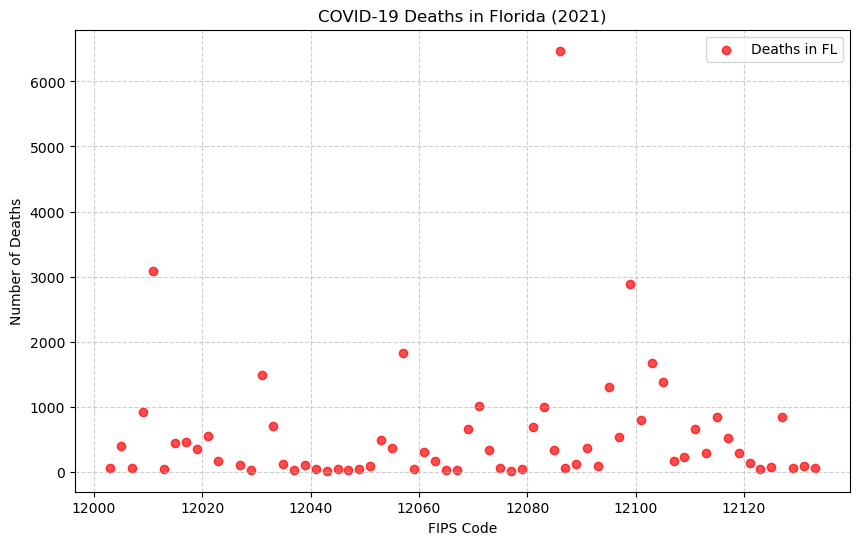

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from CSV
cvsfileFL = 'FL_death2021.csv'
dataFL = np.genfromtxt(cvsfileFL, delimiter=',')

# Extract data columns
fips_FL = dataFL[:, 0]
death_FL = dataFL[:, 1]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(fips_FL, death_FL, c='red', marker='o', alpha=0.7, label='Deaths in FL')

# Customize the plot
plt.title('COVID-19 Deaths in Florida (2021)')
plt.xlabel('FIPS Code')
plt.ylabel('Number of Deaths')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Show the plot
plt.show()


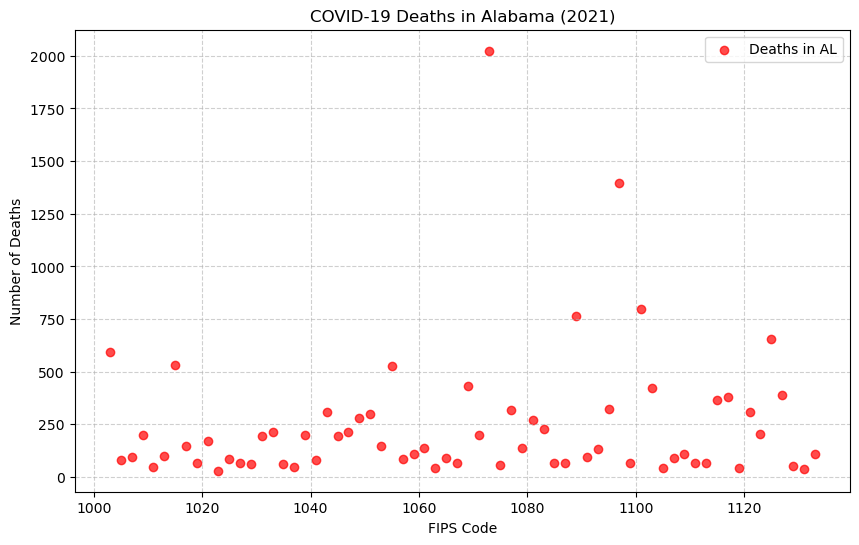

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from CSV
cvsfileAL = 'AL_death2021.csv'
dataAL = np.genfromtxt(cvsfileAL, delimiter=',')

# Extract data columns
fips_AL = dataAL[:, 0]
death_AL = dataAL[:, 1]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(fips_AL, death_AL, c='red', marker='o', alpha=0.7, label='Deaths in AL')

# Customize the plot
plt.title('COVID-19 Deaths in Alabama (2021)')
plt.xlabel('FIPS Code')
plt.ylabel('Number of Deaths')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Show the plot
plt.show()


In [3]:
import numpy as np
from scipy.stats import mannwhitneyu

# Load data for Alabama and Florida
cvsfileAL = 'AL_death2021.csv'
dataAL = np.genfromtxt(cvsfileAL, delimiter=',')
deaths_AL = dataAL[:, 1]

cvsfileFL = 'FL_death2021.csv'
dataFL = np.genfromtxt(cvsfileFL, delimiter=',')
deaths_FL = dataFL[:, 1]

# Perform the Mann-Whitney U test
statistic, p_value = mannwhitneyu(deaths_AL, deaths_FL, alternative='two-sided')

# Output the results
print(f"U statistic: {statistic}")
print(f"P-value: {p_value}")

# Make a decision based on the p-value and your chosen significance level
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in COVID-19 deaths between Alabama and Florida.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in COVID-19 deaths between Alabama and Florida.")


U statistic: 1956.5
P-value: 0.20075742499628335
Fail to reject the null hypothesis: There is no significant difference in COVID-19 deaths between Alabama and Florida.


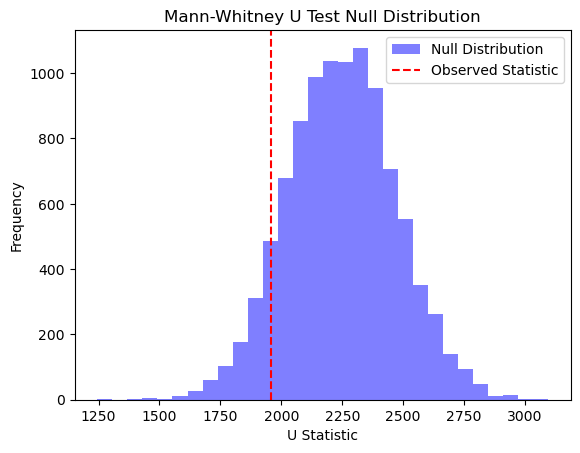

In [4]:
import numpy as np
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt

# Load data for Alabama and Florida
cvsfileAL = 'AL_death2021.csv'
dataAL = np.genfromtxt(cvsfileAL, delimiter=',')
deaths_AL = dataAL[:, 1]

cvsfileFL = 'FL_death2021.csv'
dataFL = np.genfromtxt(cvsfileFL, delimiter=',')
deaths_FL = dataFL[:, 1]

# Observed Mann-Whitney U statistic
observed_statistic, _ = mannwhitneyu(deaths_AL, deaths_FL, alternative='two-sided')

# Number of permutations for the null distribution
num_permutations = 10000

# Initialize an array to store the U statistics from permutations
null_distribution = np.zeros(num_permutations)

# Permutation test
for i in range(num_permutations):
    # Concatenate the data from both groups
    combined_data = np.concatenate((deaths_AL, deaths_FL))
    
    # Shuffle the combined data
    np.random.shuffle(combined_data)
    
    # Recreate the shuffled groups
    permuted_deaths_AL = combined_data[:len(deaths_AL)]
    permuted_deaths_FL = combined_data[len(deaths_AL):]
    
    # Calculate the U statistic for the shuffled groups
    u_statistic, _ = mannwhitneyu(permuted_deaths_AL, permuted_deaths_FL, alternative='two-sided')
    
    # Store the U statistic in the null distribution
    null_distribution[i] = u_statistic

# Create a plot to visualize the null distribution
plt.figure()
plt.hist(null_distribution, bins=30, color='blue', alpha=0.5, label='Null Distribution')
plt.axvline(observed_statistic, color='red', linestyle='dashed', label='Observed Statistic')
plt.xlabel('U Statistic')
plt.ylabel('Frequency')
plt.legend(loc='best')
plt.title('Mann-Whitney U Test Null Distribution')
plt.show()
